# Lab 2 - Probability, Distributions, and Statistical Questions

##### PHYS434 - Advanced Laboratory: Computational Data Analysis
##### Professor: Miguel Morales
<br>

##### Due date: 10/18/2021
##### By Erik Solhaug
<br>

In this lab, we will look at the use of convolutions and methods to convolve and use averages to filter signals in useful ways.

In [1]:
# Importing needed libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats, signal

# This sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)
# This sets the fontsize of the x- and y-labels
fsize = 30
lsize = 24

## Problem 1

In this problem, we will imagine that we are observing gamma-ray sources with a telescope, and that there is some incoming background noise from cosmic rays. This background is represented by a Poisson distribution. 

## A)

First, let's take a look at the background distribution - a Poisson distribution. Here we show that by summing over this distribution repeatedly, the summed (or integrated) distribution will change. Thus, also the background will change if we sum over a background in the same manner.

For our Poisson distribution, we pick the value $\mu = 5$ to be the number of expected incoming cosmic-rays in one day.

In [2]:
mu = 5
xlim1, xlim2 = (0, 20)
x1 = np.linspace(xlim1, xlim2, 1000)
pmf1 = stats.poisson.pmf(mu, x1)
x1.size, pmf1.size

(1000, 1000)

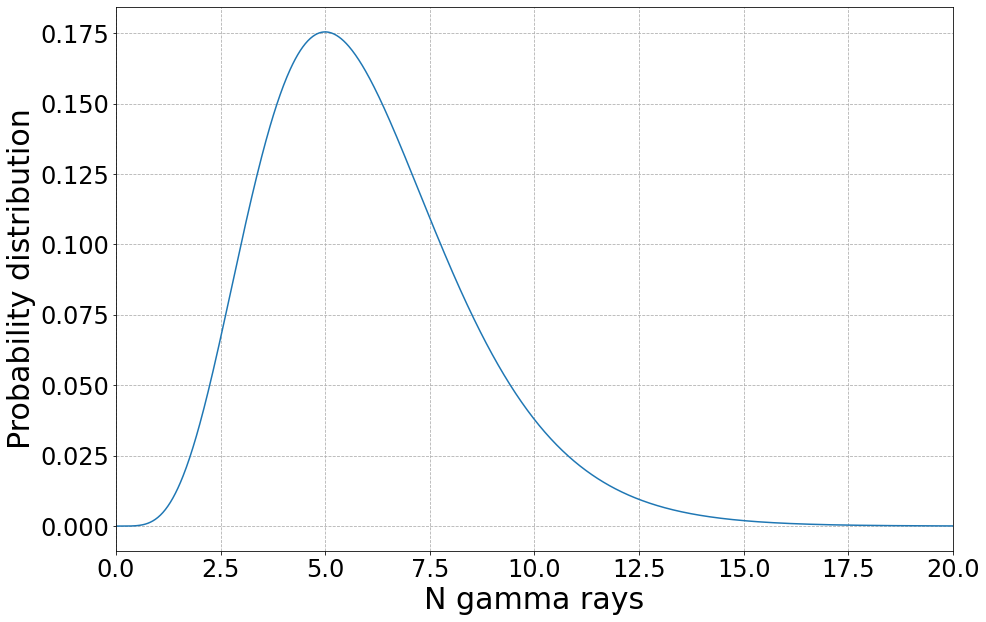

In [3]:
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 24)
ax.plot(x1, pmf1)
ax.set_xlim([x1[0], x1[-1]])
ax.set_xlabel('N gamma rays', fontsize = fsize)
ax.set_ylabel('Probability distribution', fontsize = fsize)
ax.grid(linestyle='--')
plt.show()

We sum the above distribution with itself several times.

In [4]:
num_sum = 1
pmf2 = pmf1
for num in range(0, num_sum):
    pmf2 = pmf2 + pmf1
x2 = (np.linspace(xlim1, xlim2, len(pmf2)) + mu)/(num_sum+1)

In [5]:
num_sum = 1
pmf2 = pmf1
for num in range(0, num_sum):
    pmf2 = pmf2 + pmf1
x2 = np.linspace(xlim1, xlim2, len(pmf2))
# x2 = (np.linspace(xlim1, xlim2, len(pmf2)) + mu)/(num_sum+1) # We need to shift the distribution back to where it is supposed to have its mean as we divide by the number of summed distributions
x2.size, pmf2.size, sum(pmf2)

(1000, 1000, 99.89287113338035)

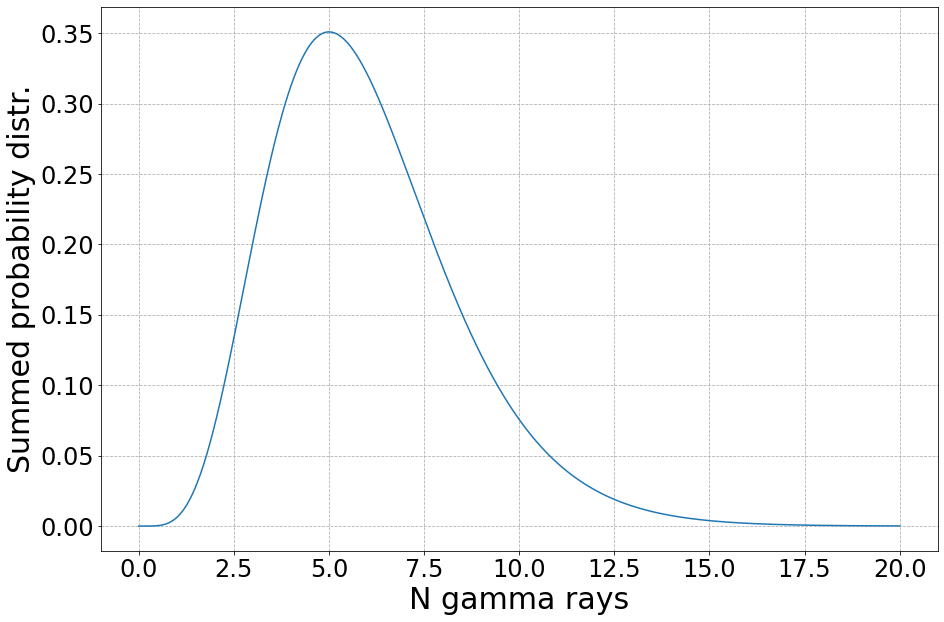

In [6]:
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 24)
ax.plot(x2, pmf2)
#ax.stairs(stats.poisson.pmf(k, mu), bins, fill=True)
#ax.set_xlim([xaxis[0], xaxis[-1]])
ax.set_xlabel('N gamma rays', fontsize = fsize)
ax.set_ylabel('Summed probability distr.', fontsize = fsize)
ax.grid(linestyle='--')
plt.show()

<!-- We can sum many times... (keep in mind that since the distribution is not centered on zero, we need to shift the distribution so that its mean is still at $\mu$) -->

We see that as we sum the two identical distributions together, their shape remains the same. However, their standard deviations are smaller now that the sum yields a summed probability distribution that is taller than before.

We continue showing this by summing 10 days of the background together.

In [7]:
num_sum = 10
pmf2 = pmf1
for num in range(0, num_sum):
    pmf2 = pmf2 + pmf1
x2 = np.linspace(xlim1, xlim2, len(pmf2))
# x2 = (np.linspace(xlim1, xlim2, len(pmf2)) + mu*num_sum)/(num_sum+1) # We need to shift the distribution back to where it is supposed to have its mean and divide by the number of summed distributions
x2.size, pmf2.size, sum(pmf2)

(1000, 1000, 549.410791233593)

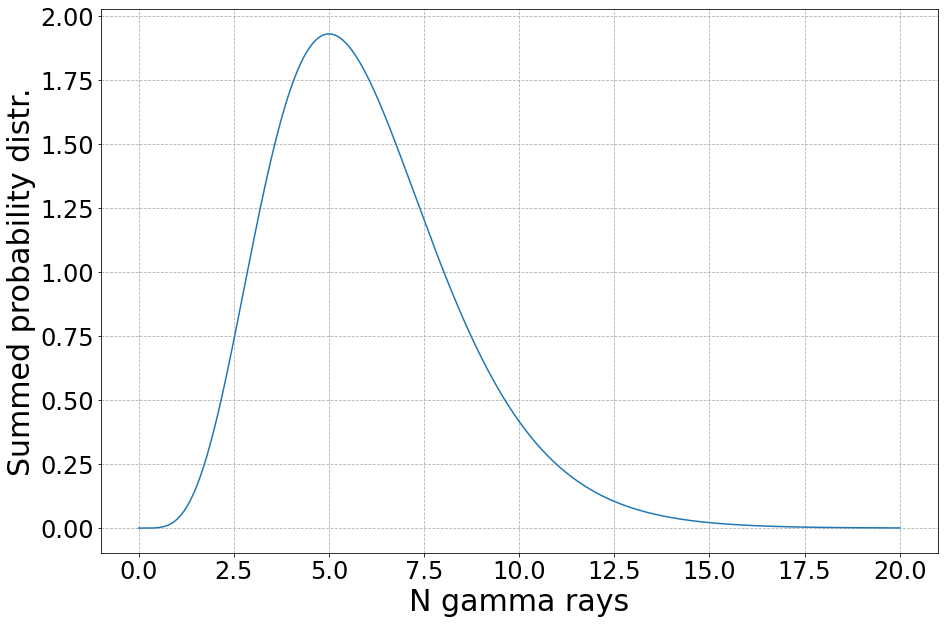

In [8]:
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 24)
ax.plot(x2, pmf2)
#ax.stairs(stats.poisson.pmf(k, mu), bins, fill=True)
#ax.set_xlim([xaxis[0], xaxis[-1]])
ax.set_xlabel('N gamma rays', fontsize = fsize)
ax.set_ylabel('Summed probability distr.', fontsize = fsize)
ax.grid(linestyle='--')
plt.show()

We see that as we sum and average the background with itself over and over, the standard deviation becomes smaller and the distribution more narrow (even though, visibly this is not immediately apparent - therefore, look at the scaled y-axis).

## B)

For example, after 5 days the standard deviation of the distribution is smaller. And this, as we show below, is still a Poisson distribution. 

In [9]:
num_sum = 5
pmf2 = pmf1
for num in range(0, num_sum):
    pmf2 = pmf2 + pmf1
x2 = np.linspace(xlim1, xlim2, len(pmf2))
# x2 = (np.linspace(xlim1, xlim2, len(pmf2)) + mu*num_sum)/(num_sum+1) # We need to shift the distribution back to where it is supposed to have its mean and divide by the number of summed distributions
x2.size, pmf2.size, sum(pmf2)

(1000, 1000, 299.67861340014014)

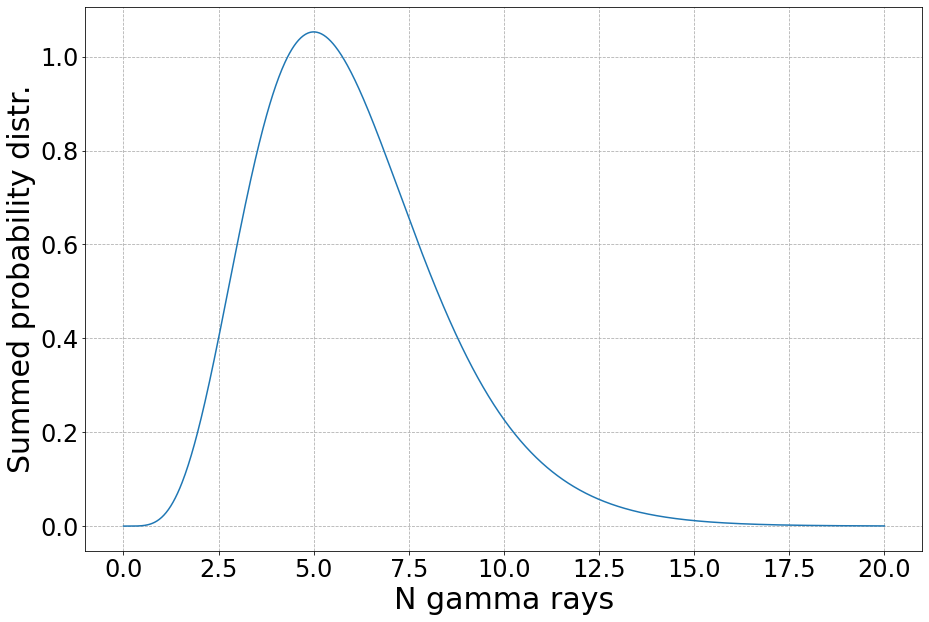

In [10]:
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 24)
ax.plot(x2, pmf2)
#ax.stairs(stats.poisson.pmf(k, mu), bins, fill=True)
#ax.set_xlim([xaxis[0], xaxis[-1]])
ax.set_xlabel('N gamma rays', fontsize = fsize)
ax.set_ylabel('Summed probability distr.', fontsize = fsize)
ax.grid(linestyle='--')
plt.show()

We can see that the distribution has retained its characteristic shape of a Poisson distribution. This makes sense conceptually because since the Poisson distribution describes the rate of occurring events then we should expect the distribution to retain its shape even though the time span of the observation expands. 

Mathematically speaking, we are adding several equal Poisson distribution in the form:
$$ \frac{\lambda^{x}}{x!} e^{-\lambda} $$
Which is essentially a linear combination of the above expression. Thus, it also makes sense mathematically that the distribution remains a Poisson distribution.

## C)

Now, we average over the number of days, and we will see that in order to do this, we need to scale the x-axis. As we do this, keep in mind that the mean of the distribution is also scaled (since the mean is not located at x=0). Therefore, we need to shift the distribution to 're-align' it at $\mu$.

In [11]:
num_sum = 5
pmf2 = pmf1
for num in range(0, num_sum):
    pmf2 = pmf2 + pmf1
# x2 = np.linspace(xlim1, xlim2, len(pmf2))
x2 = (np.linspace(xlim1, xlim2, len(pmf2)) + mu*num_sum)/(num_sum+1) # We need to shift the distribution back to where it is supposed to have its mean and divide by the number of summed distributions
x2.size, pmf2.size, sum(pmf2)

(1000, 1000, 299.67861340014014)

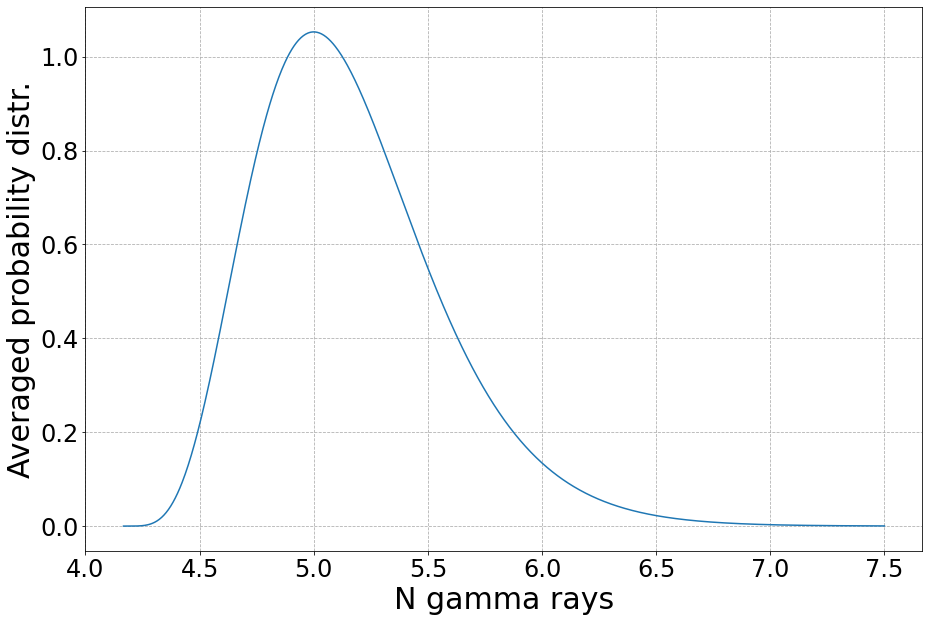

In [12]:
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 24)
ax.plot(x2, pmf2)
#ax.stairs(stats.poisson.pmf(k, mu), bins, fill=True)
#ax.set_xlim([xaxis[0], xaxis[-1]])
ax.set_xlabel('N gamma rays', fontsize = fsize)
ax.set_ylabel('Averaged probability distr.', fontsize = fsize)
ax.grid(linestyle='--')
plt.show()

In [13]:
num_sum = 10
pmf2 = pmf1
for num in range(0, num_sum):
    pmf2 = pmf2 + pmf1
# x2 = np.linspace(xlim1, xlim2, len(pmf2))
x2 = (np.linspace(xlim1, xlim2, len(pmf2)) + mu*num_sum)/(num_sum+1) # We need to shift the distribution back to where it is supposed to have its mean and divide by the number of summed distributions
x2.size, pmf2.size

(1000, 1000)

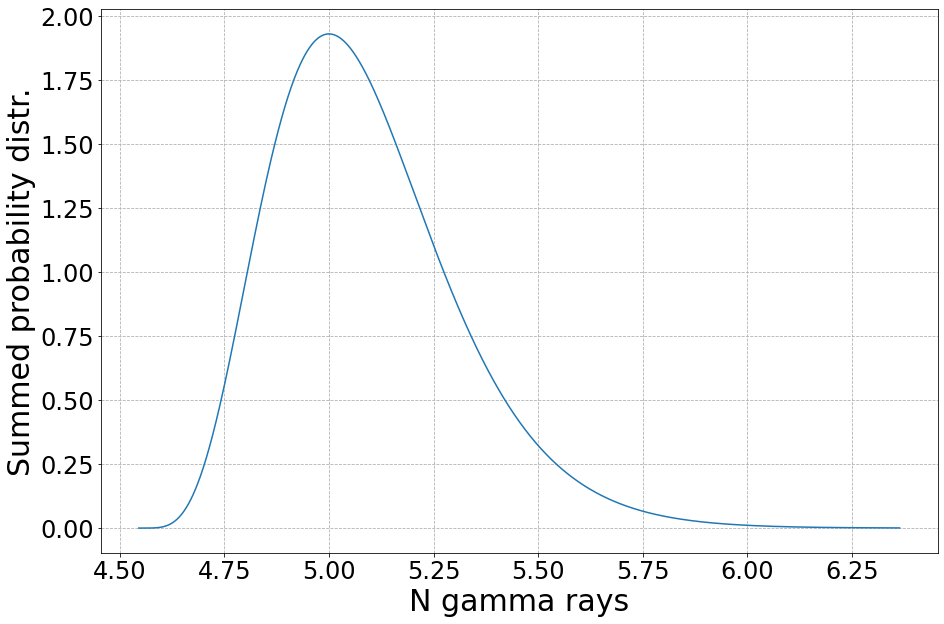

In [14]:
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 24)
ax.plot(x2, pmf2)
#ax.stairs(stats.poisson.pmf(k, mu), bins, fill=True)
#ax.set_xlim([xaxis[0], xaxis[-1]])
ax.set_xlabel('N gamma rays', fontsize = fsize)
ax.set_ylabel('Summed probability distr.', fontsize = fsize)
ax.grid(linestyle='--')
plt.show()

In [15]:
num_sum = 100
pmf2 = pmf1
for num in range(0, num_sum):
    pmf2 = pmf2 + pmf1
# x2 = np.linspace(xlim1, xlim2, len(pmf2))
x2 = (np.linspace(xlim1, xlim2, len(pmf2)) + mu*num_sum)/(num_sum+1) # We need to shift the distribution back to where it is supposed to have its mean and divide by the number of summed distributions
x2.size, pmf2.size

(1000, 1000)

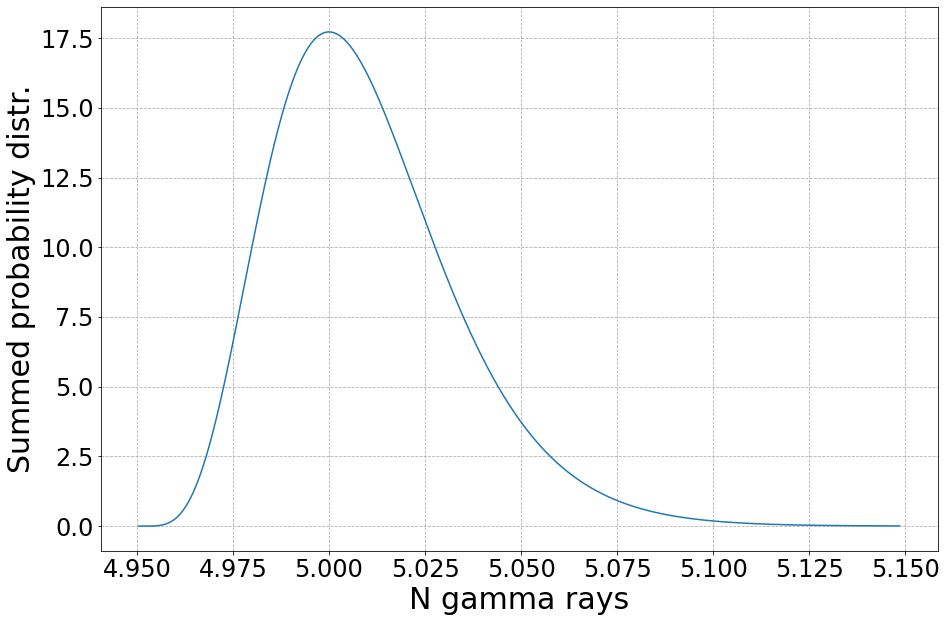

In [16]:
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 24)
ax.plot(x2, pmf2)
#ax.stairs(stats.poisson.pmf(k, mu), bins, fill=True)
#ax.set_xlim([xaxis[0], xaxis[-1]])
ax.set_xlabel('N gamma rays', fontsize = fsize)
ax.set_ylabel('Summed probability distr.', fontsize = fsize)
ax.grid(linestyle='--')
plt.show()

We can see that when we average the distribution with itself over and over, it becomes more and more Gaussian. This is essentially what the central limit theorem states.

## D)

Set N = 20 and Y = 8. Then, Y*N = 160
Now, we imagine that we observe for N days and that we Y*N gamma-rays coming from our observed gamma-ray source. Let's calculate the 'sigma' of our observation - namely, how large is the probability in 'sigma' that the incoming sigal was produced by the background noise, as we have described above.
In this case, we need to use the pmf() (equivalent to the pdf()) of the discrete distribution). We sum the distribution 20 times.

Then we take the integral (cdf() right of that function to our value Y) keeping in mind we have to subtract this from 1 since it's an integral from the right to our value.

In [17]:
mu = 5
Y = 8
N = 20
prob_poisson = (1 - stats.poisson.cdf(Y, mu))
prob_poisson

0.06809363472184837

In [18]:
sigma = stats.poisson.ppf(1 - prob_poisson, mu)

In [19]:
print(f'The sigma of the observation is {sigma}.')

The sigma of the observation is 8.0.


## Problem 2

Let's pick a skewed continuous distribution - the Rayleigh distribution.

## A)

Now, we are going to show how this distribution changes as we average over more observing intervals N.

In [20]:
N = 1

xlim1, xlim2 = 0, 20
x = np.linspace(xlim1, xlim2, 50)
rayleigh = stats.rayleigh.pdf(x)
rayleigh

array([0.00000000e+00, 3.75541366e-01, 5.85004730e-01, 5.78588729e-01,
       4.30601732e-01, 2.54331753e-01, 1.22079956e-01, 4.82282404e-02,
       1.57997917e-02, 4.31329952e-03, 9.84510998e-04, 1.88327809e-04,
       3.02448856e-05, 4.08329463e-06, 4.63916477e-07, 4.43910228e-08,
       3.57984101e-09, 2.43433461e-10, 1.39649436e-11, 6.76088184e-13,
       2.76318865e-14, 9.53626618e-16, 2.77976456e-17, 6.84521611e-19,
       1.42426991e-20, 2.50432406e-22, 3.72169741e-24, 4.67515921e-26,
       4.96481800e-28, 4.45762667e-30, 3.38403680e-32, 2.17235790e-34,
       1.17929717e-36, 5.41425297e-39, 2.10233819e-41, 6.90459963e-44,
       1.91808338e-46, 4.50722216e-49, 8.95943927e-52, 1.50660556e-54,
       2.14328739e-57, 2.57951149e-60, 2.62653882e-63, 2.26272433e-66,
       1.64927190e-69, 1.01712943e-72, 5.30754147e-76, 2.34343554e-79,
       8.75515251e-83, 2.76779305e-86])

In [21]:
new_rayleigh = rayleigh
if N != 1:
    for i in range(0, N-1): # We have nine OTHER dice to convolve 
        new_rayleigh = signal.convolve(rayleigh, new_rayleigh)
rayleigh = new_rayleigh

To plot the average, we need to 'shrink' the x-axis by a factor of the number of Rayleigh distributions we have added which is in this case N.

In [22]:
bins = np.arange(N-1, len(rayleigh)+N)
bins = bins - (bins[1]-bins[0])/2
bins = bins/N # This is where we shrink the x-axis by dividing by N
bins

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
       10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5,
       21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5,
       32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5,
       43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5])

In [ ]:
fig, ax = plt.subplots(2, 1)
left, right = (0, 10)
plt.tick_params(labelsize = lsize/2)
ax[0].stairs(rayleigh, bins, fill=True)
ax[0].set_xlim([left, right])
ax[0].set_xlabel('Data', fontsize = fsize/2)
ax[0].set_ylabel('Averaged Probability Distribution', fontsize = fsize/2)
ax[1].stairs(rayleigh, bins, fill=True)
ax[1].set_xlabel('Data', fontsize = fsize/2)
ax[1].set_ylabel('Averaged Probability Distribution', fontsize = fsize/2)
ax[1].set_xlim([left, right])
ax[1].set_ylim([1e-13, 1e0])
ax[1].set_yscale('log')
plt.show()

In [ ]:
N = 2

xlim1, xlim2 = 0, 20
x = np.linspace(xlim1, xlim2, 20)
rayleigh = stats.rayleigh.pdf(x)

new_rayleigh = rayleigh
if N != 1:
    for i in range(0, N-1): # We have nine OTHER dice to convolve 
        new_rayleigh = signal.convolve(rayleigh, new_rayleigh)
rayleigh = new_rayleigh

bins = np.arange(N-1, len(rayleigh)+N)
bins = bins - (bins[1]-bins[0])/2
bins = bins/N # This is where we shrink the x-axis by dividing by N

In [ ]:
fig, ax = plt.subplots(2, 1)
left, right = (0, 5)
plt.tick_params(labelsize = lsize/2)
ax[0].stairs(rayleigh, bins, fill=True)
ax[0].set_xlim([left, right])
ax[0].set_xlabel('Data', fontsize = fsize/2)
ax[0].set_ylabel('Averaged Probability Distribution', fontsize = fsize/2)
ax[1].stairs(rayleigh, bins, fill=True)
ax[1].set_xlabel('Data', fontsize = fsize/2)
ax[1].set_ylabel('Averaged Probability Distribution', fontsize = fsize/2)
ax[1].set_xlim([left, right])
ax[1].set_ylim([1e-13, 1e0])
ax[1].set_yscale('log')
plt.show()

In [ ]:
N = 5

xlim1, xlim2 = 0, 20
x = np.linspace(xlim1, xlim2, 20)
rayleigh = stats.rayleigh.pdf(x)

new_rayleigh = rayleigh
if N != 1:
    for i in range(0, N-1): # We have nine OTHER dice to convolve 
        new_rayleigh = signal.convolve(rayleigh, new_rayleigh)
rayleigh = new_rayleigh

bins = np.arange(N-1, len(rayleigh)+N)
bins = bins - (bins[1]-bins[0])/2
bins = bins/N # This is where we shrink the x-axis by dividing by N

In [ ]:
fig, ax = plt.subplots(2, 1)
left, right = (0, 5)
plt.tick_params(labelsize = lsize/2)
ax[0].stairs(rayleigh, bins, fill=True)
ax[0].set_xlim([left, right])
ax[0].set_xlabel('Data', fontsize = fsize/2)
ax[0].set_ylabel('Averaged Probability Distribution', fontsize = fsize/2)
ax[1].stairs(rayleigh, bins, fill=True)
ax[1].set_xlabel('Data', fontsize = fsize/2)
ax[1].set_ylabel('Averaged Probability Distribution', fontsize = fsize/2)
ax[1].set_xlim([left, right])
ax[1].set_ylim([1e-13, 1e0])
ax[1].set_yscale('log')
plt.show()

In [ ]:
N = 8

xlim1, xlim2 = 0, 20
x = np.linspace(xlim1, xlim2, 20)
rayleigh = stats.rayleigh.pdf(x)

new_rayleigh = rayleigh
if N != 1:
    for i in range(0, N-1): # We have nine OTHER dice to convolve 
        new_rayleigh = signal.convolve(rayleigh, new_rayleigh)
rayleigh = new_rayleigh

bins = np.arange(N-1, len(rayleigh)+N)
bins = bins - (bins[1]-bins[0])/2
bins = bins/N # This is where we shrink the x-axis by dividing by N

In [ ]:
fig, ax = plt.subplots(2, 1)
left, right = (0, 5)
plt.tick_params(labelsize = lsize/2)
ax[0].stairs(rayleigh, bins, fill=True)
ax[0].set_xlim([left, right])
ax[0].set_xlabel('Data', fontsize = fsize/2)
ax[0].set_ylabel('Averaged Probability Distribution', fontsize = fsize/2)
ax[1].stairs(rayleigh, bins, fill=True)
ax[1].set_xlabel('Data', fontsize = fsize/2)
ax[1].set_ylabel('Averaged Probability Distribution', fontsize = fsize/2)
ax[1].set_xlim([left, right])
ax[1].set_ylim([1e-13, 1e0])
ax[1].set_yscale('log')
plt.show()

In [ ]:
N = 10

xlim1, xlim2 = 0, 20
x = np.linspace(xlim1, xlim2, 20)
rayleigh = stats.rayleigh.pdf(x)

new_rayleigh = rayleigh
if N != 1:
    for i in range(0, N-1): # We have nine OTHER dice to convolve 
        new_rayleigh = signal.convolve(rayleigh, new_rayleigh)
rayleigh = new_rayleigh

bins = np.arange(N-1, len(rayleigh)+N)
bins = bins - (bins[1]-bins[0])/2
bins = bins/N # This is where we shrink the x-axis by dividing by N

In [ ]:
fig, ax = plt.subplots(2, 1)
left, right = (0, 5)
plt.tick_params(labelsize = lsize/2)
ax[0].stairs(rayleigh, bins, fill=True)
ax[0].set_xlim([left, right])
ax[0].set_xlabel('Data', fontsize = fsize/2)
ax[0].set_ylabel('Averaged Probability Distribution', fontsize = fsize/2)
ax[1].stairs(rayleigh, bins, fill=True)
ax[1].set_xlabel('Data', fontsize = fsize/2)
ax[1].set_ylabel('Averaged Probability Distribution', fontsize = fsize/2)
ax[1].set_xlim([left, right])
ax[1].set_ylim([1e-13, 1e0])
ax[1].set_yscale('log')
plt.show()

In [ ]:
N = 14

xlim1, xlim2 = 0, 20
x = np.linspace(xlim1, xlim2, 20)
rayleigh = stats.rayleigh.pdf(x)

new_rayleigh = rayleigh
if N != 1:
    for i in range(0, N-1): # We have nine OTHER dice to convolve 
        new_rayleigh = signal.convolve(rayleigh, new_rayleigh)
rayleigh = new_rayleigh

bins = np.arange(N-1, len(rayleigh)+N)
bins = bins - (bins[1]-bins[0])/2
bins = bins/N # This is where we shrink the x-axis by dividing by N

In [ ]:
fig, ax = plt.subplots(2, 1)
left, right = (0, 5)
plt.tick_params(labelsize = lsize/2)
ax[0].stairs(rayleigh, bins, fill=True)
ax[0].set_xlim([left, right])
ax[0].set_xlabel('Data', fontsize = fsize/2)
ax[0].set_ylabel('Averaged Probability Distribution', fontsize = fsize/2)
ax[1].stairs(rayleigh, bins, fill=True)
ax[1].set_xlabel('Data', fontsize = fsize/2)
ax[1].set_ylabel('Averaged Probability Distribution', fontsize = fsize/2)
ax[1].set_xlim([left, right])
ax[1].set_ylim([1e-13, 1e0])
ax[1].set_yscale('log')
plt.show()

In [ ]:
N = 20

xlim1, xlim2 = 0, 20
x = np.linspace(xlim1, xlim2, 20)
rayleigh = stats.rayleigh.pdf(x)

new_rayleigh = rayleigh
if N != 1:
    for i in range(0, N-1): # We have nine OTHER dice to convolve 
        new_rayleigh = signal.convolve(rayleigh, new_rayleigh)
rayleigh = new_rayleigh

bins = np.arange(N-1, len(rayleigh)+N)
bins = bins - (bins[1]-bins[0])/2
bins = bins/N # This is where we shrink the x-axis by dividing by N

In [ ]:
fig, ax = plt.subplots(2, 1)
left, right = (0, 5)
plt.tick_params(labelsize = lsize/2)
ax[0].stairs(rayleigh, bins, fill=True)
ax[0].set_xlim([left, right])
ax[0].set_xlabel('Data', fontsize = fsize/2)
ax[0].set_ylabel('Averaged Probability Distribution', fontsize = fsize/2)
ax[1].stairs(rayleigh, bins, fill=True)
ax[1].set_xlabel('Data', fontsize = fsize/2)
ax[1].set_ylabel('Averaged Probability Distribution', fontsize = fsize/2)
ax[1].set_xlim([left, right])
ax[1].set_ylim([1e-13, 1e0])
ax[1].set_yscale('log')
plt.show()

In [ ]:
N = 40

xlim1, xlim2 = 0, 20
x = np.linspace(xlim1, xlim2, 20)
rayleigh = stats.rayleigh.pdf(x)

new_rayleigh = rayleigh
if N != 1:
    for i in range(0, N-1): # We have nine OTHER dice to convolve 
        new_rayleigh = signal.convolve(rayleigh, new_rayleigh)
rayleigh = new_rayleigh

bins = np.arange(N-1, len(rayleigh)+N)
bins = bins - (bins[1]-bins[0])/2
bins = bins/N # This is where we shrink the x-axis by dividing by N

In [ ]:
fig, ax = plt.subplots(2, 1)
left, right = (0, 5)
plt.tick_params(labelsize = lsize/2)
ax[0].stairs(rayleigh, bins, fill=True)
ax[0].set_xlim([left, right])
ax[0].set_xlabel('Data', fontsize = fsize/2)
ax[0].set_ylabel('Averaged Probability Distribution', fontsize = fsize/2)
ax[1].stairs(rayleigh, bins, fill=True)
ax[1].set_xlabel('Data', fontsize = fsize/2)
ax[1].set_ylabel('Averaged Probability Distribution', fontsize = fsize/2)
ax[1].set_xlim([left, right])
ax[1].set_ylim([1e-13, 1e0])
ax[1].set_yscale('log')
plt.show()

In [ ]:
N = 50

xlim1, xlim2 = 0, 20
x = np.linspace(xlim1, xlim2, 20)
rayleigh = stats.rayleigh.pdf(x)

new_rayleigh = rayleigh
if N != 1:
    for i in range(0, N-1): # We have nine OTHER dice to convolve 
        new_rayleigh = signal.convolve(rayleigh, new_rayleigh)
rayleigh = new_rayleigh

bins = np.arange(N-1, len(rayleigh)+N)
bins = bins - (bins[1]-bins[0])/2
bins = bins/N # This is where we shrink the x-axis by dividing by N

In [ ]:
fig, ax = plt.subplots(2, 1)
left, right = (0, 5)
plt.tick_params(labelsize = lsize/2)
ax[0].stairs(rayleigh, bins, fill=True)
ax[0].set_xlim([left, right])
ax[0].set_xlabel('Data', fontsize = fsize/2)
ax[0].set_ylabel('Averaged Probability Distribution', fontsize = fsize/2)
ax[1].stairs(rayleigh, bins, fill=True)
ax[1].set_xlabel('Data', fontsize = fsize/2)
ax[1].set_ylabel('Averaged Probability Distribution', fontsize = fsize/2)
ax[1].set_xlim([left, right])
ax[1].set_ylim([1e-13, 1e0])
ax[1].set_yscale('log')
plt.show()

As we can see, the distribution becomes more and more similar to a Gaussian as we average more and more Rayleigh distributions together.

## B)

Yes, it becomes a Gaussian distribution after a certain number of observation intervals N (number of convolutions and averages). This, can be seen and concluded with by looking at the above plots. It seems like plotting the log of the y-axis has helped me here in determining after how many N the distribution becomes Gaussian, so if we consider both the general shape of the distribution and its semilog-plot, I would say the distribution becomes Gaussian after about 40 observation intervals (N = 40). This we can see since the semilog plot has a parabolic shape (which is a characteristic of the Gaussian) and that the non-semilog plot is hard to distinguish from a Gaussian plot.

## Problem 3

Now, we take a look at the analyses that come up in actual observations, such as from neutron star mergers detected by gravity-waves. For this problem, we assume that we have an observation from an optical telescope with a thermal noise background from its CCD. This background appears as a zero-mean Gaussian with constant width over the image.

## Version 1

Let's pretend we have an alert from LIGO (an interferometry observatory) that is also seen by the x-ray/UV satellite SWIFT. We get a precise location from SWIFT and take an image of that part of the sky. From SWIFT's accuracy, we know which pixel to look for a counterpart in.

## A)

We have a Gaussian background with width X = 5. We see a signal of strength Y = 22. Let's calculate the significance of this detection. Will we be able to claim a discovery? Let's see.

In [ ]:
# X = 5
# Y = 22
# N = 1 # We only have one observation interval

# xlim1, xlim2 = -10, 10
# x = np.linspace(xlim1, xlim2, 20)
# gaussian = stats.norm.rvs(X, size = 100000)
# gaussian_pdf = stats.norm.pdf(x)

# bins = np.arange(N-1, len(gaussian)+N)
# bins = bins - (bins[1]-bins[0])/2
# bins = bins/N

# fig, ax = plt.subplots(1, 1)
# left, right = (-20, 20)
# plt.tick_params(labelsize = lsize/2)
# ax.plot(x, gaussian_pdf)
# ax.stairs(gaussian, bins, fill=True)
# ax.set_xlim([left, right])
# ax.set_xlabel('Background', fontsize = fsize/2)
# ax.set_ylabel('Probability Distribution', fontsize = fsize/2)
# plt.show()

In [ ]:
X = 5
Y = 22
prob_dist = 1 - stats.norm.cdf(Y, loc = 0, scale = X)
sigma = stats.norm.ppf(1-prob_dist)

In [ ]:
print(f'The probability of the background producing this signal is {prob_dist:.3e}, and the sigma corresponding to this probability is {sigma:.1f}.')

Thus, unfortunately, if our threshold for discovery is $5\sigma$ then this is not enough to claim a discovery and we have to continue sampling data.

## Version 2

This, time we have an alert from LIGO, but no associated detection from SWIFT. This could be because it is a black hole-merger, a black hole-neutron star merger (neither seem to emit X-rays or UV light), or it could because SWIFT was indisposed at the time (wrong side of the earth in its orbit). Whatever the cause, we know what region of the sky to look in, but not which pixel.

## B)

If we have to look for a signal in 10k pixels, what is the probability distribution of your background?

In this case, since we are looking for a signal in each of the 10k pixels, we have to ask the question:
What is the probability distribution of of our background from Part 1 summed with itself 10k times?

We are essentially dealing with trials.

In [ ]:
N = 1

xlim1, xlim2 = -30, 30
x = np.linspace(xlim1, xlim2, 10000)
gaussian = stats.norm.pdf(x, loc = 0, scale = X)

new_gaussian = gaussian
if N != 1:
    for i in range(0, N-1): # We have nine OTHER dice to convolve 
        new_gaussian = signal.convolve(gaussian, new_gaussian)
gaussian = new_gaussian

bins = np.linspace(xlim1, xlim2, len(gaussian)+N)
bins = bins - (bins[1]-bins[0])/2
bins = bins/N # This is where we shrink the x-axis by dividing by N
gaussian

In [ ]:
N_pixels = 1e4

gaussian = gaussian * N_pixels

In [ ]:
fig, ax = plt.subplots(2, 1)
left, right = (-30, 30)
plt.tick_params(labelsize = lsize/2)
ax[0].stairs(gaussian, bins, fill=True)
ax[0].set_xlim([left, right])
ax[0].set_xlabel('Data', fontsize = fsize/2)
ax[0].set_ylabel('Averaged Probability Distribution', fontsize = fsize/2)
ax[1].stairs(gaussian, bins, fill=True)
ax[1].set_xlabel('Data', fontsize = fsize/2)
ax[1].set_ylabel('Averaged Probability Distribution', fontsize = fsize/2)
ax[1].set_xlim([left, right])
# ax[1].set_ylim([1e-13, 1e0])
ax[1].set_yscale('log')
plt.show()

## C)

Now, we take our brightest candidate signal from the region (assuming it has the same signal as in part 1) and calculate the significance of this detection. Remember, we use the same Y as in Part A.

In [ ]:
prob_dist = (1 - stats.norm.cdf(Y, loc = 0, scale = X)) * N_pixels
sigma = stats.norm.ppf(1-prob_dist / N_pixels)

In [ ]:
print(f'The probability of the background producing this signal is {prob_dist:.3e}, and the sigma corresponding to this probability is {sigma:.1f}.')

## Problem 4

The statistical issue we were exploring in the previous problem is called a trials factor (sometimes known as a look-elsewhere effect). This is an important effect, as if you search through a million locations, you would expect to se ~1 one in a million event. However, it is also often over estimated how big an impact this makes on the sensitivity of a search. So in this part of the lab we are going to invert the problem.**

Let us again assume we have a Gaussian background (same parameters as Problem 3).

## A)

Let's calculate the signal required for a 5-sigma detection in Version 1.

In [ ]:
prob_5sigma = 1/3.5e6
sig = stats.norm.ppf(1 - prob_5sigma, loc = 0, scale = X)
threshold = (1 - stats.norm.cdf(sig, loc = 0, scale = X))

In [ ]:
print(f'The signal would need to be have a probability of being created by the background of less than {threshold:.2e}.')

## B)

In [ ]:
prob_5sigma = 1/3.5e6
sig = stats.norm.ppf(1 - prob_5sigma / N_pixels, loc = 0, scale = X)
threshold = (1 - stats.norm.cdf(sig, loc = 0, scale = X)) * N_pixels

In [ ]:
print(f'The signal would need to be have a probability of being created by the background of less than {threshold:.2e}.')

## C)

It seems like these probabilities are equal, so there is an error in my conceptual understanding :)

## D)

Not quite sure, but I believe it would probably change by a certain factor of 